In [1]:
import numpy as np
import pandas as pd
import os.path
import shutil
import datetime
from dateutil.rrule import rrule, MONTHLY

In [2]:
#generated_path = 'E:\\dtuklaptop\\e\\Users\\Mat\\python\\data\\property\\checked\\'
generated_path = 'J://My Drive//NAS//My Documents//Business//Property//Statements//working//python//data//property//checked//'

def sumOf(df,cat):
    g=pd.Grouper(freq="M")
    return df.loc[df.Cat == cat,'Amount'].groupby(g).sum()

def sumOfSubcat(df,subcat):
    g=pd.Grouper(freq="M")
    return df.loc[df.Subcat ==subcat,'Amount'].groupby(g).sum()

def get_pty_summary(df):
    dfPty = pd.DataFrame()
    dfPty['Mortgage']=sumOf(df,'Mortgage')
    dfPty['PropertyExpense']=sumOf(df,'PropertyExpense')
    dfPty['ServiceCharge']=sumOf(df,'ServiceCharge')
    dfPty['OurRent']=sumOf(df,'OurRent')
    dfPty['BealsRent']=sumOf(df,'BealsRent')

    dfPty = dfPty.fillna(0)

    dfPty['TotalRent']=dfPty['OurRent'] + dfPty['BealsRent']
    dfPty['NetProfit']=dfPty['OurRent'] + dfPty['BealsRent'] + dfPty['Mortgage'] + dfPty['PropertyExpense'] + dfPty['ServiceCharge']
    #dfPty['Withdrawls']=sumOf(df,'Withdrawls')
    
    return dfPty

def plot_properties_income_expenditure(dfPty, start, end):
    dfBar=pd.DataFrame()
    dfBar['OurRent'] = dfPty.loc[start:end]['OurRent']
    dfBar['BealsRent'] = dfPty.loc[start:end]['BealsRent']
    dfBar['Mortgage'] = abs(dfPty.loc[start:end]['Mortgage'])
    dfBar['PropertyExpense'] = abs(dfPty.loc[start:end]['PropertyExpense'])
    dfBar['ServiceCharge'] = abs(dfPty.loc[start:end]['ServiceCharge'])
    dfBar.index = dfBar.index.strftime('%b %y')

    ax = dfBar[['Mortgage','PropertyExpense','ServiceCharge']].plot.bar(stacked=True, position=1, width=.3, color=['red','blue','orange'])
    ax.axhline(5000, color="gray",linestyle='--')
    ax.axhline(10000, color="gray",linestyle='--')
    ax.axhline(15000, color="gray",linestyle='--')
    ax.axhline(20000, color="gray",linestyle='--')
    dfBar[['BealsRent','OurRent']].plot.bar(stacked=True,ax=ax, position=0, width=.3, color=['pink','darkgreen'],figsize=(30,15),fontsize=20).legend(loc=2, prop={'size': 20})

def plot_properties_net_income(dfPty, start, end):
    dfBar=pd.DataFrame()

    dfBar['NetProfit'] = dfPty.loc[start:end]['NetProfit']
    dfBar.index = dfBar.index.strftime('%b %y')

    ax = dfBar[['NetProfit']].plot.bar(stacked=True, position=1, width=.3, color=['blue'],figsize=(30,15),fontsize=20)
    ax.axhline(0, color="gray",linestyle='-')
    ax.axhline(5000, color="gray",linestyle='--')
    ax.axhline(10000, color="gray",linestyle='--')
    ax.axhline(15000, color="gray",linestyle='--')
    ax.axhline(20000, color="gray",linestyle='--')

    ax.legend(loc=2, prop={'size': 20})
    
def get_outgoings(df):
    dfOut = pd.DataFrame()
    dfOut['PersonalExpense']=sumOf(df,'PersonalExpense')
    dfOut['Hilltop']=sumOf(df,'Hilltop')
    dfOut['Car']=sumOf(df,'Car')
    dfOut['RegularPayment']=sumOf(df,'RegularPayment')
    dfOut['SchoolFee']=sumOf(df,'SchoolFee')
    dfOut['HMRCDD']=sumOf(df,'HMRCDD')
    dfOut['HMRC']=sumOf(df,'HMRC')    
    dfOut['OtherIncome']=sumOf(df,'OtherIncome')
    dfOut['OtherExpense']=sumOf(df,'OtherExpense')
    dfOut['TotalOther']=dfOut['OtherIncome']+dfOut['OtherExpense']
    dfOut = dfOut.fillna(0)
    dfOut['TotalOutgoings']=dfOut['SchoolFee'] + dfOut['Car'] + dfOut['Hilltop'] + dfOut['PersonalExpense'] + dfOut['RegularPayment']+dfOut['HMRCDD']+dfOut['HMRC']+dfOut['TotalOther']
    dfOut['TotalOutgoingsExclSchool']=dfOut['Car'] + dfOut['Hilltop'] + dfOut['PersonalExpense'] + dfOut['RegularPayment']+dfOut['HMRCDD']+dfOut['HMRC']+dfOut['TotalOther']
    return dfOut
    
def plot_outgoings(dfOut, start, end):
    dfBar=pd.DataFrame()
    #dfBar['NetProfit'] = dfOut.loc[start:end]['DataFrame']
    dfBar['PersonalExpense'] = abs(dfOut.loc[start:end]['PersonalExpense'])
    dfBar['Hilltop'] = abs(dfOut.loc[start:end]['Hilltop'])
    dfBar['SchoolFee'] = abs(dfOut.loc[start:end]['SchoolFee'])
    dfBar['RegularPayment'] = abs(dfOut.loc[start:end]['RegularPayment'])
    dfBar['HMRCDD'] = abs(dfOut.loc[start:end]['HMRCDD'])
    dfBar['Car'] = abs(dfOut.loc[start:end]['Car'])
    #dfBar['TotalOther'] = dfOut.loc[start:end]['TotalOther']
    dfBar.index = dfBar.index.strftime('%b %y')

    ax = dfBar[['PersonalExpense','RegularPayment','Hilltop','HMRCDD','Car','SchoolFee']].plot.bar(stacked=True, position=1, width=.3, color=['red','blue','orange','black','green','yellow'],figsize=(30,15),fontsize=20)
    #ax = dfBar[['PersonalExpense','RegularPayment','Hilltop','HMRCDD']].plot.bar(stacked=True, position=1, width=.3, color=['red','blue','orange','black'],figsize=(30,15),fontsize=20)
    ax.axhline(5000, color="gray",linestyle='--')
    ax.axhline(10000, color="gray",linestyle='--')
    ax.axhline(15000, color="gray",linestyle='--')
    ax.axhline(20000, color="gray",linestyle='--')
    ax.legend(loc=2, prop={'size': 20})
    #dfBar[['TotalOther']].plot.bar(stacked=True,ax=ax, position=0, width=.3, color=['grey'],figsize=(30,15),fontsize=20).legend(loc=2, prop={'size': 20})

def get_personal_spending_summary(df):
    dfPs = pd.DataFrame()
    dfPs['TotalPersonalExpense']=sumOf(df,'PersonalExpense')
    dfPs['Garage']=sumOfSubcat(df,'Garage')
    dfPs['Food']=pd.concat([sumOfSubcat(df,'Tesco'),sumOfSubcat(df,'Garage'),sumOfSubcat(df,'M&S'),\
                            sumOfSubcat(df,'Waitrose'),sumOfSubcat(df,'Morrisons'),sumOfSubcat(df,'LIDL'), \
                            sumOfSubcat(df,'COOP'),sumOfSubcat(df,'Budgens'),sumOfSubcat(df,'Costco'),\
                            sumOfSubcat(df,'A1 Foods'),sumOfSubcat(df,'Sainsburys'),sumOfSubcat(df,'ASDA')],axis=1).sum(axis=1)


    dfPs['Body']=sumOfSubcat(df,'Pharmacy/Opticians/Dental')
    dfPs['Beauty']=sumOfSubcat(df,'Beauty')
    dfPs['EatingOut']=sumOfSubcat(df,'EatingOut')
    dfPs['Coffee']=sumOfSubcat(df,'Coffee')
    dfPs['Car']=sumOfSubcat(df,'Car')
    dfPs['Amazon']=sumOfSubcat(df,'Amazon')  
    dfPs['Clothing']=sumOfSubcat(df,'Clothing')
    dfPs['Houshold']=sumOfSubcat(df,'Houshold')
    dfPs['Cash']=sumOfSubcat(df,'Cash')    
    dfPs['Other']=sumOfSubcat(df,'Other')
    dfPs = dfPs.fillna(0)
    return dfPs

def load_data(start, end):
    csvext='.csv'
    xlsext='.xlsx'
    start_date=datetime.datetime.strptime(start, '%Y-%m-%d')
    end_date=datetime.datetime.strptime(end, '%Y-%m-%d')
    dates = [dt for dt in rrule(MONTHLY, dtstart=start_date, until=end_date)]

    dfAll=pd.DataFrame()
    dfAll=pd.DataFrame(columns=['Account','Amount','Subcategory','Memo','Property','Description','Cat','Subcat'])

    for date in dates:
        dateStr= date.strftime("%b").upper() + date.strftime("%Y")
        input_file=generated_path + dateStr + '_codedAndCategorised'
        csvExist=os.path.isfile(input_file + csvext)
        xlsExist=os.path.isfile(input_file + xlsext)
        if((not csvExist)&(not xlsExist)):
            print('Warning missing file: ' + input_file)
            continue
        # Load excel file if both types exist
        if xlsExist:
            print('Reading file: ' + input_file + xlsext)
            dfTemp=pd.read_excel(input_file + xlsext, index_col=0, parse_dates=True, dayfirst=True)
        else:
            print('Reading file: ' + input_file + csvext)
            dfTemp=pd.read_csv(input_file + csvext, index_col=0, parse_dates=True, dayfirst=True)
        dfAll=pd.concat([dfAll,dfTemp])
        dfAll=dfAll[['Account','Amount','Subcategory','Memo','Property','Description','Cat','Subcat']]

    return dfAll

def plot_drawings(df,start,end):
    dfBar=pd.DataFrame()
    dfBar['Drawings'] = abs(sumOf(df,'Drawings'))
    dfBar.index = dfBar.index.strftime('%b %y')

    ax = dfBar[['Drawings']].plot.bar(stacked=True, position=1, width=.3, color=['red'],figsize=(30,15),fontsize=20)
    ax.axhline(2500, color="gray",linestyle='--')
    ax.axhline(5000, color="gray",linestyle='--')
    ax.axhline(10000, color="gray",linestyle='--')
    ax.legend(loc=2, prop={'size': 20})

In [3]:
start='2025-01-01'
end='2025-09-30'
dfAll=load_data(start,end)

Reading file: J://My Drive//NAS//My Documents//Business//Property//Statements//working//python//data//property//checked//JAN2025_codedAndCategorised.xlsx
Reading file: J://My Drive//NAS//My Documents//Business//Property//Statements//working//python//data//property//checked//FEB2025_codedAndCategorised.xlsx
Reading file: J://My Drive//NAS//My Documents//Business//Property//Statements//working//python//data//property//checked//MAR2025_codedAndCategorised.xlsx


C:\Users\MSTDTP21\.conda\envs\mtpython36\lib\site-packages\ipykernel_launcher.py:145: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



Reading file: J://My Drive//NAS//My Documents//Business//Property//Statements//working//python//data//property//checked//APR2025_codedAndCategorised.xlsx
Reading file: J://My Drive//NAS//My Documents//Business//Property//Statements//working//python//data//property//checked//MAY2025_codedAndCategorised.xlsx
Reading file: J://My Drive//NAS//My Documents//Business//Property//Statements//working//python//data//property//checked//JUN2025_codedAndCategorised.xlsx
Reading file: J://My Drive//NAS//My Documents//Business//Property//Statements//working//python//data//property//checked//JUL2025_codedAndCategorised.xlsx
Reading file: J://My Drive//NAS//My Documents//Business//Property//Statements//working//python//data//property//checked//AUG2025_codedAndCategorised.xlsx
Reading file: J://My Drive//NAS//My Documents//Business//Property//Statements//working//python//data//property//checked//SEP2025_codedAndCategorised.xlsx


### Properties - Monthly Summary

In [4]:
dfPty=get_pty_summary(dfAll)
dfPty

,Mortgage,PropertyExpense,ServiceCharge,OurRent,BealsRent,TotalRent,NetProfit
2025-01-31,-23449.59,-3111.89,-1100.0,28954.80,3564.53,32519.33,4857.85
2025-02-28,-23449.59,-3679.00,-1100.0,26774.80,4497.55,31272.35,3043.76
2025-03-31,-22768.24,-3129.11,-1100.0,33313.60,3021.36,36334.96,9337.61
2025-04-30,-22587.27,-8374.71,-1100.0,29098.65,3062.98,32161.63,99.65
2025-05-31,-22587.27,-3487.11,-1100.0,28291.02,3739.36,32030.38,4856.00
2025-06-30,-21912.38,-4982.47,-1100.0,33302.69,1880.57,35183.26,7188.41
2025-07-31,-21732.56,-6624.32,-1100.0,37260.81,1818.60,39079.41,9622.53
2025-08-31,-21732.56,-8745.15,-1100.0,31320.00,1812.60,33132.60,1554.89
2025-09-30,-21023.09,-2857.54,-1100.0,33370.00,1767.60,35137.60,10156.97


In [5]:
plot_properties_net_income(dfPty,start,end)

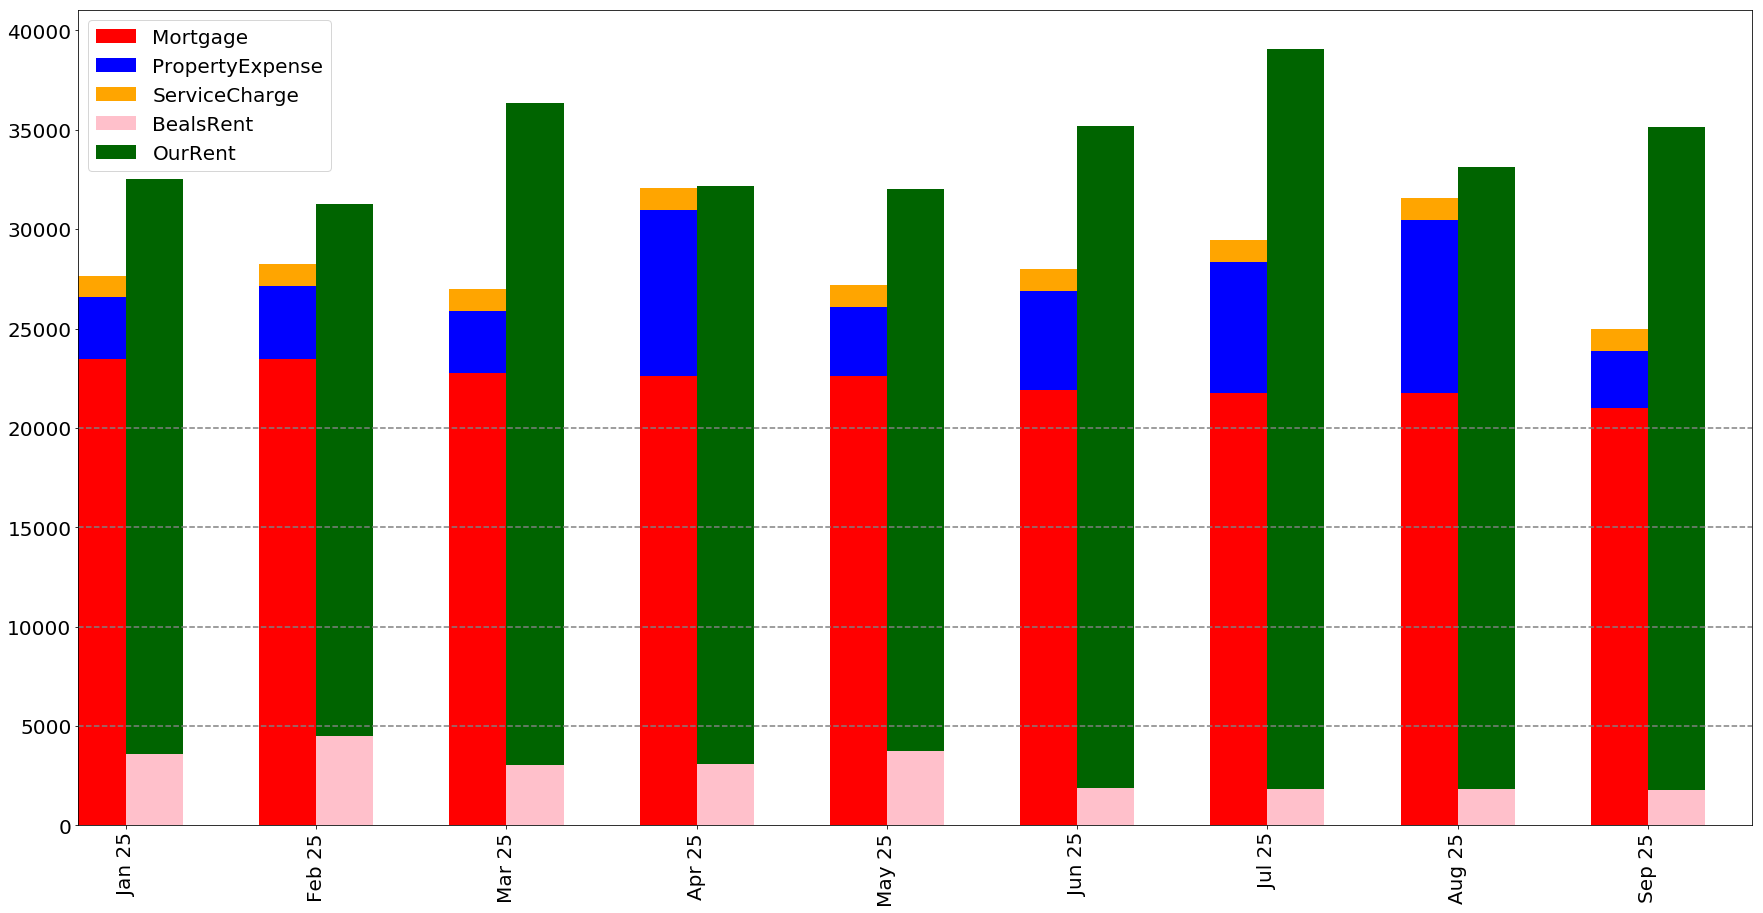

In [6]:
plot_properties_income_expenditure(dfPty,start,end)

### Outgoings Summary

- Includes School Fee, Hilltop, Direct Debits, CardPayments, HMRC

In [7]:
dfOut=get_outgoings(dfAll)
dfOut[['PersonalExpense','Hilltop','Car','RegularPayment','SchoolFee','HMRCDD','HMRC','TotalOther','TotalOutgoings','TotalOutgoingsExclSchool']].tail(32)

,PersonalExpense,Hilltop,Car,RegularPayment,SchoolFee,HMRCDD,HMRC,TotalOther,TotalOutgoings,TotalOutgoingsExclSchool
2025-01-31,-4282.77,-300.0,0.0,-1409.26,-2806.68,0.0,0.0,0.00,-8798.71,-5992.03
2025-02-28,-3127.51,-300.0,0.0,-1188.81,-2806.66,0.0,0.0,-110.93,-7533.91,-4727.25
2025-03-31,-4285.73,-1370.0,0.0,-1557.85,-2806.66,0.0,0.0,0.00,-10020.24,-7213.58
2025-04-30,-3859.95,-300.0,0.0,-1655.81,0.00,0.0,0.0,0.00,-5815.76,-5815.76
2025-05-31,-1633.14,-300.0,0.0,-1174.91,-2807.30,0.0,0.0,0.00,-5915.35,-3108.05
2025-06-30,-5219.89,-300.0,0.0,-1297.71,-2807.29,0.0,0.0,0.00,-9624.89,-6817.60
2025-07-31,-4898.10,-300.0,0.0,-1265.26,-2807.29,0.0,0.0,0.00,-9270.65,-6463.36
2025-08-31,-7360.22,-300.0,0.0,-1226.77,0.00,0.0,0.0,0.00,-8886.99,-8886.99
2025-09-30,-6840.52,-300.0,0.0,-1611.92,-2887.14,0.0,0.0,0.00,-11639.58,-8752.44


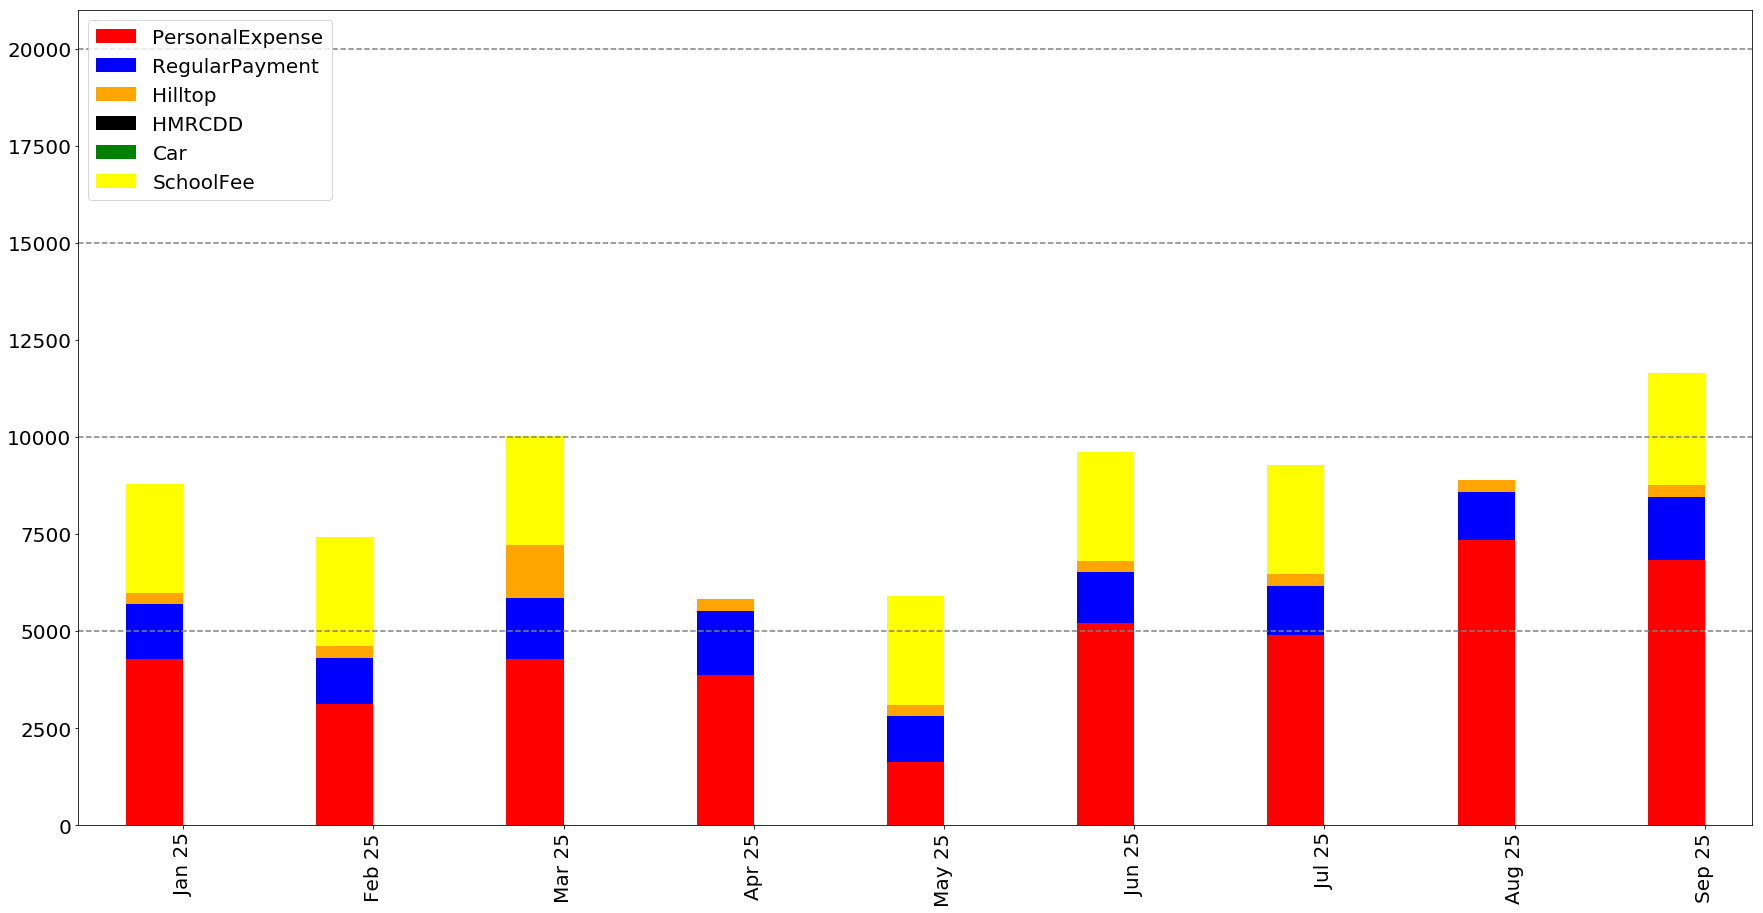

In [8]:
plot_outgoings(dfOut,start,end)

### Drawings

In [9]:
plot_drawings(dfAll,start,end)

TypeError: no numeric data to plot

### Personal Spending Summary

In [ ]:
### Pie chart DDs and Card payments, excluding School Fee and HMRC

In [ ]:
dfPsSummary=get_personal_spending_summary(dfAll)
dfPsSummary.tail(12)

### Regular Payments

In [ ]:
dfAll.loc[(dfAll.Cat=='RegularPayment')]['2022-12-01':'2023-11-30']

In [ ]:
dfAll.loc[(dfAll.Account=='20-53-97 30728691')&(dfAll.Cat=='RegularPayment')]['2022-12-01':'2023-11-30']

Notes on regular payments:
- 6045 Paypal payment of £15.99 is for Netflix

In [ ]:
dfBack=dfAll.copy()

### Mortgage Payments

In [ ]:
dfAll.head()

In [ ]:
dfAll.loc[(dfAll.Cat=='Mortgage')]

In [ ]:
dfAll[(dfAll['Cat'] == 'Mortgage') & (pd.isna(dfAll['Property']))]

In [ ]:
dfAll[dfAll['Cat'] == 'Mortgage'].to_csv('all_mortgages_data.csv', index=True)